<AxesSubplot:>

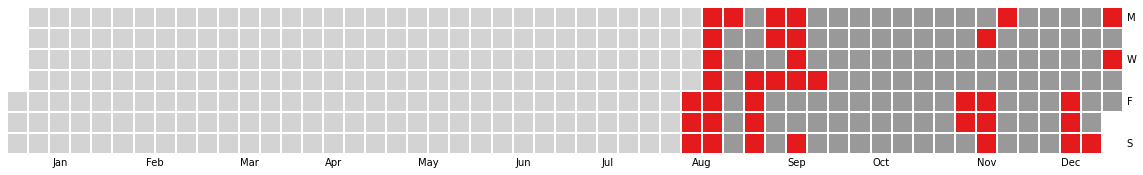

In [382]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import calmap


data = pd.read_csv("/Users/111244rfsf/Desktop/DoorDashArchive/data_archive/dasher_delivery_information.csv", 
    parse_dates= ['ORDER_CREATED_TIME', 'ACTUAL_PICKUP_TIME', 'ACTUAL_DELIVERY_TIME']
)

# Creating new features from the data
data['year'] = data.ORDER_CREATED_TIME.dt.year
data['month'] = data.ORDER_CREATED_TIME.dt.month
data['Weekday'] = data.ORDER_CREATED_TIME.dt.day_name()
data['s'] = 1
data.ORDER_CREATED_TIME = pd.to_datetime(data.ORDER_CREATED_TIME.dt.date)


df = data.loc[:, ["ORDER_CREATED_TIME", "s"]]
#Setting the date_time column as the index
df = df.groupby(df.loc[:, "ORDER_CREATED_TIME"]).sum()

df.loc[:, "s"] = 1
df
#plotting the calender heatmap for the year 2010
plt.figure(figsize=(20,10))
calmap.yearplot(df['s'], year=2021,cmap='Set1_r', 
    fillcolor='lightgrey',
    daylabels='MTWTFSS',
    dayticks=[0, 2, 4, 6],
    linewidth=2)





<AxesSubplot:>

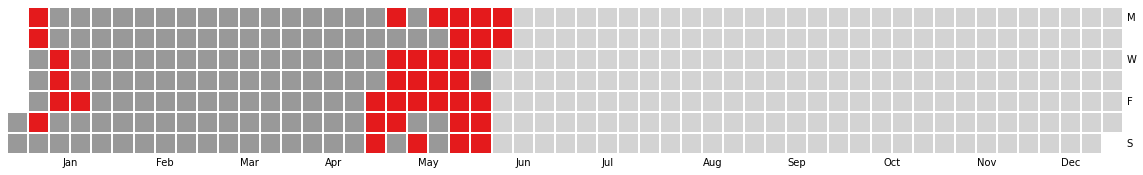

In [378]:
plt.figure(figsize=(20,10))
calmap.yearplot(df['s'], year=2022,cmap='Set1_r', 
    fillcolor='lightgrey',
    daylabels='MTWTFSS',
    dayticks=[0, 2, 4, 6],
    linewidth=2)

In [ ]:
plt.figure(figsize=(20,10))
calmap.yearplot(data, 
cmap='inferno', 
year='2022',
fillcolor='lightgrey',
daylabels='MTWTFSS',
dayticks=[0, 2, 4, 6],
linewidth=2)

<AxesSubplot:>

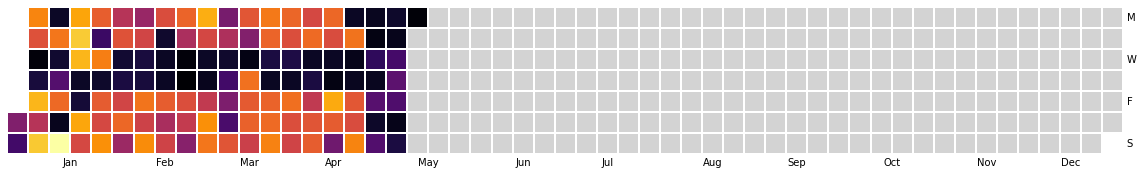

In [136]:
df = pd.read_csv("/Users/111244rfsf/Documents/Repositories/step_program/steps.csv")

del df["Unnamed: 0"]
df.date = df.date.map(lambda date : "/".join(date.split("_")))

df.date = pd.to_datetime(df.date)
df = df.where(df.date.dt.year > 2021) 
df = df.groupby(df.date).sum()


plt.figure(figsize=(20,10))
calmap.yearplot(df.loc[:, 'value'], 
    cmap='inferno', 
    fillcolor='lightgrey',
    daylabels='MTWTFSS',
    dayticks=[0, 2, 4, 6],
    linewidth=2)